# Calculating the actual distance to the markers

The position of the markers are defined in coordinates relative to the room corner.

To calculate the distance to the camera I need to use trig.  The coordianates of all the marker points and the camera is loaded and then the distances are caluclated

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# function to calculate the trig function in degrees (python and numpy use radians)
def dtr(trig, angle):
    if trig == "cos":
        return np.cos(angle/180.*np.pi)
    elif trig == "sin":
        return np.sin(angle/180.*np.pi)
    elif trig == "tan":
        return np.tan(angle/180.*np.pi)
    else:
        return "Error"

In [9]:
# Position of the camera in the coordnate system
camera_coordinates = np.array([2643*dtr('cos',45),2643*dtr('cos',45),692])
camera_coordinates

array([1868.88322268, 1868.88322268,  692.        ])

In [10]:
aruco_centers = np.zeros((10,3))

for i in range(6):    
    aruco_centers[i]= np.array([(1700-i*280)*dtr("cos", 45), (1700-i*280)*dtr("cos", 45), 0])

aruco_centers[6]= np.array([200, 0, 331])
aruco_centers[7]= np.array([0, 200, 329])
aruco_centers[8]= np.array([0, 900, 326])
aruco_centers[9]= np.array([900, 0, 333])

distance = np.zeros(aruco_centers.shape[0])

for i, pt in enumerate(aruco_centers):
    
    distance[i] = np.sqrt(np.sum(np.power(pt-camera_coordinates,2)))

In [11]:
distance

array([1169.66362686, 1405.20212069, 1654.65192714, 1912.57758013,
       2175.9671413 , 2443.05403133, 2531.44557732, 2531.73156376,
       2136.68322387, 2135.49530535])

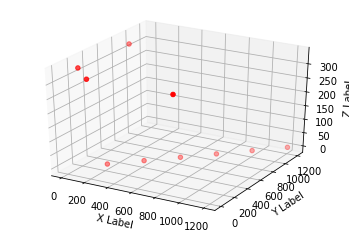

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = aruco_centers[:,0]
y = aruco_centers[:,1]
z = aruco_centers[:,2]


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [14]:
# the coordianates of all the aruco centers (x, y, z)
aruco_centers

array([[1202.08152802, 1202.08152802,    0.        ],
       [1004.09162928, 1004.09162928,    0.        ],
       [ 806.10173055,  806.10173055,    0.        ],
       [ 608.11183182,  608.11183182,    0.        ],
       [ 410.12193309,  410.12193309,    0.        ],
       [ 212.13203436,  212.13203436,    0.        ],
       [ 200.        ,    0.        ,  331.        ],
       [   0.        ,  200.        ,  329.        ],
       [   0.        ,  900.        ,  326.        ],
       [ 900.        ,    0.        ,  333.        ]])